In [34]:
import itertools
from math import sqrt
import multiprocessing as mp
from multiprocessing import Pool
#mp.set_start_method('spawn')

import matplotlib
from matplotlib import pyplot as plt

import numpy as np

font = {'size'   : 30}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 90
#plt.rcParams["figure.figsize"]=10,8
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-whitegrid')

In [35]:
def rg(w,D,ed):
    d = 1
    deltaed = -4 * d * ed / ((w - D/2)**2 - ed**2)  # rg equation for |e_D|, with Delta (:= V^2  rho)=1
    if ed * (ed + deltaed) <= 0:
        return 0
    else:
        return ed+deltaed

In [36]:
def complete_rg(w, D0, ed):
    N = D0*10
    Df = D0/2
    x = []
    y = []
    z = []
    den = (w - D0/2)**2 - ed**2
    count = N+1
    for D in np.linspace(D0, Df, N):
        count -= 1
        if den * ((w - D/2)**2 - ed**2) <= 0 or ed == 0:
            return x, y, z, True
        den = (w - D/2)**2 - ed**2
        x.append(D)
        y.append(ed)
        z.append(count)
        ed = rg(w, D, ed)
    return x, y, z, False

## Relevant and Irrelevant Flows

True


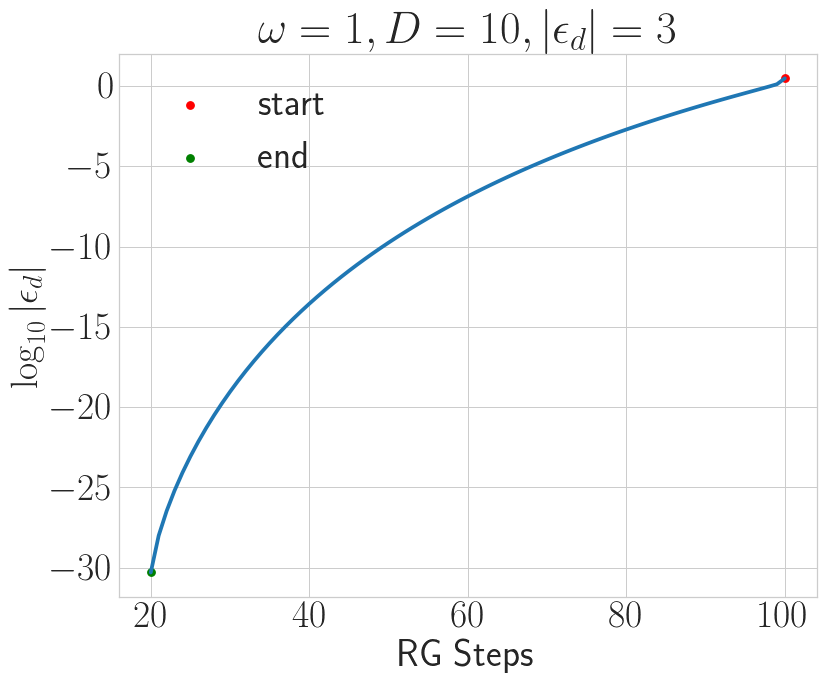

False


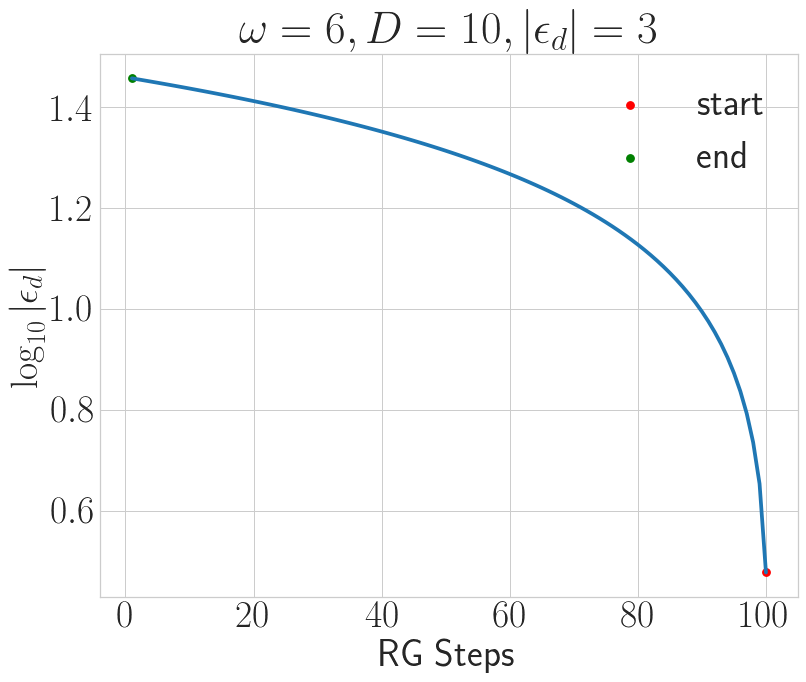

In [44]:
ed = 3
D0 = 10
for w in [1, 6]:
    x, y, z, flag = complete_rg(w, D0, ed)
    y = np.log10(y)
    print (flag)
    plt.plot(z, y, lw=3)
    plt.scatter(z[0], y[0], marker="o", color='r', label=r"start")
    plt.scatter(z[-1], y[-1], marker="o", color='g', label=r"end")
    plt.legend()
    plt.title(r"$\omega={}, D={}, |\epsilon_d|={}$".format(w,D0,ed))
    plt.xlabel(r"RG Steps")
    plt.ylabel(r"$\log_{10}|\epsilon_d|$")
    plt.legend()
    plt.show()

## Change in relevant $|\epsilon_d|^*$ with increase in bandwidth

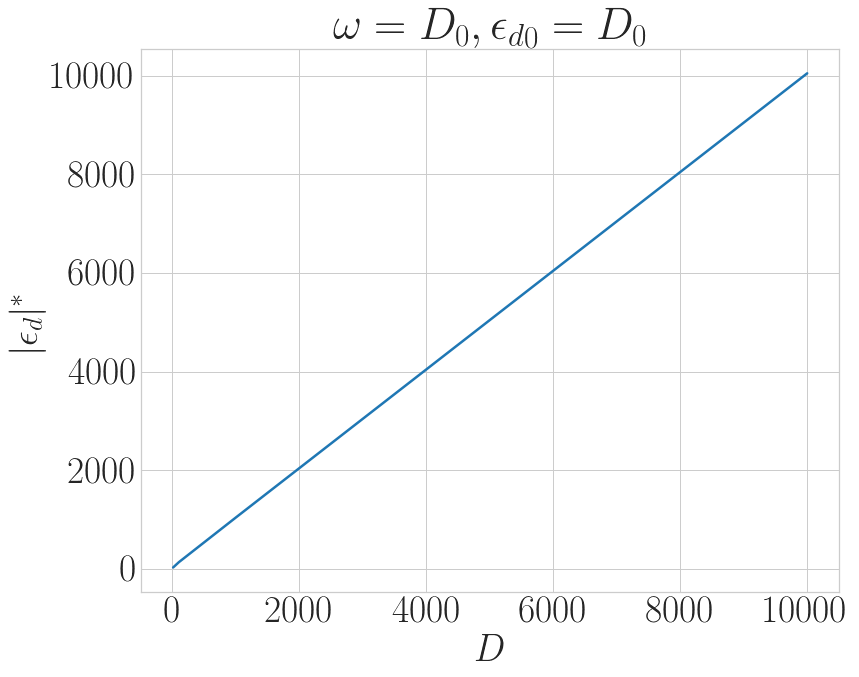

In [46]:
edfp = []
D0_range = [10,100,1000,10000]
for D0 in D0_range:
    ed = D0
    w = D0/100
    x, y, z, flag = complete_rg(w, D0, ed)
    edfp.append(y[-1])

plt.title(r"$\omega = D_0, {\epsilon_d}_0 = D_0$")
plt.plot(D0_range, edfp)
plt.ylabel(r"$|\epsilon_d|^*$")
plt.xlabel(r"$D$")
plt.show()